Inteligencia Artificial y Aprendizaje Automático
---
*Actividad Semanas 3 y 4:*
---
Modelado, Balanceo e Importancia de Factores

---
Maestría en Inteligencia Artificial Aplicada
---
Tecnológico de Monterrey
---
Prof. Luis Eduardo Falcón Morales


---

Nombre: Jesus Mario Martinez Diaz
---
Matrícula: A01740049

---



---

Esta Tarea se deberá resolver de manera individual y es parte de lo que estarás estudiando en las semanas 3 y 4 del curso. Deberás generar un archivo de Jupyter-Notebook con los análisis y comentarios que se te piden en los ejercicios.
---
La rotación de personal es uno de los problemas que afecta actualmente a muchas empresas y organizaciones, grandes o pequeñas y de cualquier tipo de negocio. En esta actividad usaremos una base de datos generada por IBM para estudiar cómo enfrentar dicho problema. Deberás descargar el archivo de la siguiente liga de Kaggle, la cual consta de 1470 registros y 35 columnas:
---
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

PARTE 1: Análisis descriptivo y preprocesamiento de los datos:

---


1) Incluye una breve introducción sobre lo que se entiende por el problema de rotación de
personal en las organizaciones (employee attrition problem).

El problema de rotación de personal se refiere a las conscuencias por las que las reuncias o despidos de personal empiezan a afectar negativamente a la empresa, ya sea por altos costes de liquidación o de recontratación y capacitación, además de el de perder valor en la emrpesa al dejar ir personas que pueden generar un cambio positivo, además de afectar a la moral y productividad de los empleados que siguen laborando.

1) Carga la base de datos y realiza los análisis necesarios para responder a las siguientes
preguntas:

---


a) ¿Cuántas y cuáles de las variables son numéricas?

In [201]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import os
DIR = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(DIR)

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
num_numeric_vars = len(df.select_dtypes(include=['int64', 'float64']).columns)
# Writing the correct statement in code with the obtained data
correct_statement = f"Hay {num_numeric_vars} variables numéricas"
correct_statement

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'Hay 26 variables numéricas'

i. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?

In [202]:
integer_vars = df.select_dtypes(include=['int64']).columns.tolist()

num_integer_vars = len(integer_vars), integer_vars
num_integer_vars

(26,
 ['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'])

ii. ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?

In [203]:
float_vars = df.select_dtypes(include=['float64']).columns.tolist()

num_float_vars = len(float_vars)
print(num_float_vars)

0


iii. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden
anular del problema? Justifica tu respuesta.

In [204]:
constant_vars = [var for var in df.columns if df[var].nunique() == 1]

missing_values_vars = df.columns[df.isnull().any()].tolist()

constant_vars, missing_values_vars

(['EmployeeCount', 'Over18', 'StandardHours'], [])

Son variables constantes y no representan un factor para el analisis

b) ¿Cuántas y cuáles de las variables son categóricas?

i. ¿Cuántas y cuáles de estas variables son binarias?


In [205]:
binary_vars = [var for var in df.columns if df[var].nunique() == 2]

# Number and names of binary variables
num_binary_vars = len(binary_vars), binary_vars
num_binary_vars

(4, ['Attrition', 'Gender', 'OverTime', 'PerformanceRating'])

ii. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de
niveles que tiene cada una de estas variables.

In [206]:
nominal_vars = df.select_dtypes(include=['object']).columns.tolist()
nominal_vars_levels = {var: df[var].nunique() for var in nominal_vars}

num_nominal_vars = len(nominal_vars), nominal_vars_levels
num_nominal_vars

(9,
 {'Attrition': 2,
  'BusinessTravel': 3,
  'Department': 3,
  'EducationField': 6,
  'Gender': 2,
  'JobRole': 9,
  'MaritalStatus': 3,
  'Over18': 1,
  'OverTime': 2})

iii. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles que tiene cada una de estas variables.

In [207]:
potential_ordinal_vars = {var: df[var].nunique() for var in df.columns if df[var].dtype in ['int64', 'float64'] and df[var].nunique() > 2}

non_ordinal_vars = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber',
                    'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                    'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

ordinal_vars = {var: levels for var, levels in potential_ordinal_vars.items() if var not in non_ordinal_vars}

num_ordinal_vars = len(ordinal_vars), ordinal_vars
num_ordinal_vars


(7,
 {'Education': 5,
  'EnvironmentSatisfaction': 4,
  'JobInvolvement': 4,
  'JobLevel': 5,
  'JobSatisfaction': 4,
  'RelationshipSatisfaction': 4,
  'WorkLifeBalance': 4})

iv. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden anular del problema? Justifica tu respuesta.

In [208]:
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
constant_categorical_vars = [var for var in categorical_vars if df[var].nunique() == 1]

high_cardinality_vars = {var: df[var].nunique() for var in categorical_vars if df[var].nunique() > 10}

constant_categorical_vars, high_cardinality_vars

(['Over18'], {})

Over18: Esta variable es constante en todo el dataset, lo que indica que todos los registros tienen el mismo valor. Por lo tanto, no aporta variabilidad ni información útil que pueda influir en el análisis de la rotación de personal o en la construcción de modelos predictivos.

c) En esta base de datos y con base a la información dada, ¿existe alguna o algunas
variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y
por qué?

**PerformanceRating**: Aunque numéricamente representada, podría considerarse ordinal si los números representan niveles de rendimiento. Si los números son códigos sin un orden o jerarquía inherente, podría tratarse como nominal.

**Education**: Representada numéricamente, generalmente se considera ordinal ya que representa niveles de educación. Sin embargo, si los números no tienen un orden lógico o si simplemente representan diferentes tipos de educación sin una jerarquía, podrían ser nominales.

**JobLevel**: Si bien es numérica y podría interpretarse como ordinal, también podría ser vista como nominal si los niveles no implican una jerarquía o progresión.

**Department, EducationField, JobRole**: Aunque son categóricas, la decisión de tratarlas como nominales u ordinales depende de si el analista considera que hay un orden inherente en estas categorías.

d) De existir, elimina del problema todas las variables que consideraste que no están aportando información alguna.

In [209]:
vars_to_remove = ['EmployeeCount', 'Over18', 'StandardHours']

data_cleaned = df.drop(columns=vars_to_remove)

data_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


3) Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y
15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para
los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve
la estratificación de las clases de la variable “Attrition”.
a) Despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y
Prueba.

In [210]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop('Attrition', axis=1)
y = data_cleaned['Attrition']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42) # 0.1765 ≈ 15/85

train_dim, val_dim, test_dim = (X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

training_set_output = f"Conjunto de Entrenamiento: Xtrain = {X_train.shape}, ytrain = {y_train.shape}"
validation_set_output = f"Conjunto de Validación: Xval = {X_val.shape}, yval = {y_val.shape}"
test_set_output = f"Conjunto de Prueba: Xtest = {X_test.shape}, ytest = {y_test.shape}"

training_set_output, validation_set_output, test_set_output

('Conjunto de Entrenamiento: Xtrain = (1028, 31), ytrain = (1028,)',
 'Conjunto de Validación: Xval = (221, 31), yval = (221,)',
 'Conjunto de Prueba: Xtest = (221, 31), ytest = (221,)')

4) Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas.
---

> a) Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?

> i. Aplica las transformaciones que hayas determinado realizar, evitando el
filtrado de información (data-leakage). A estas nuevas variables
transformadas llamarlas XtrainT, XvalT y XtestT.

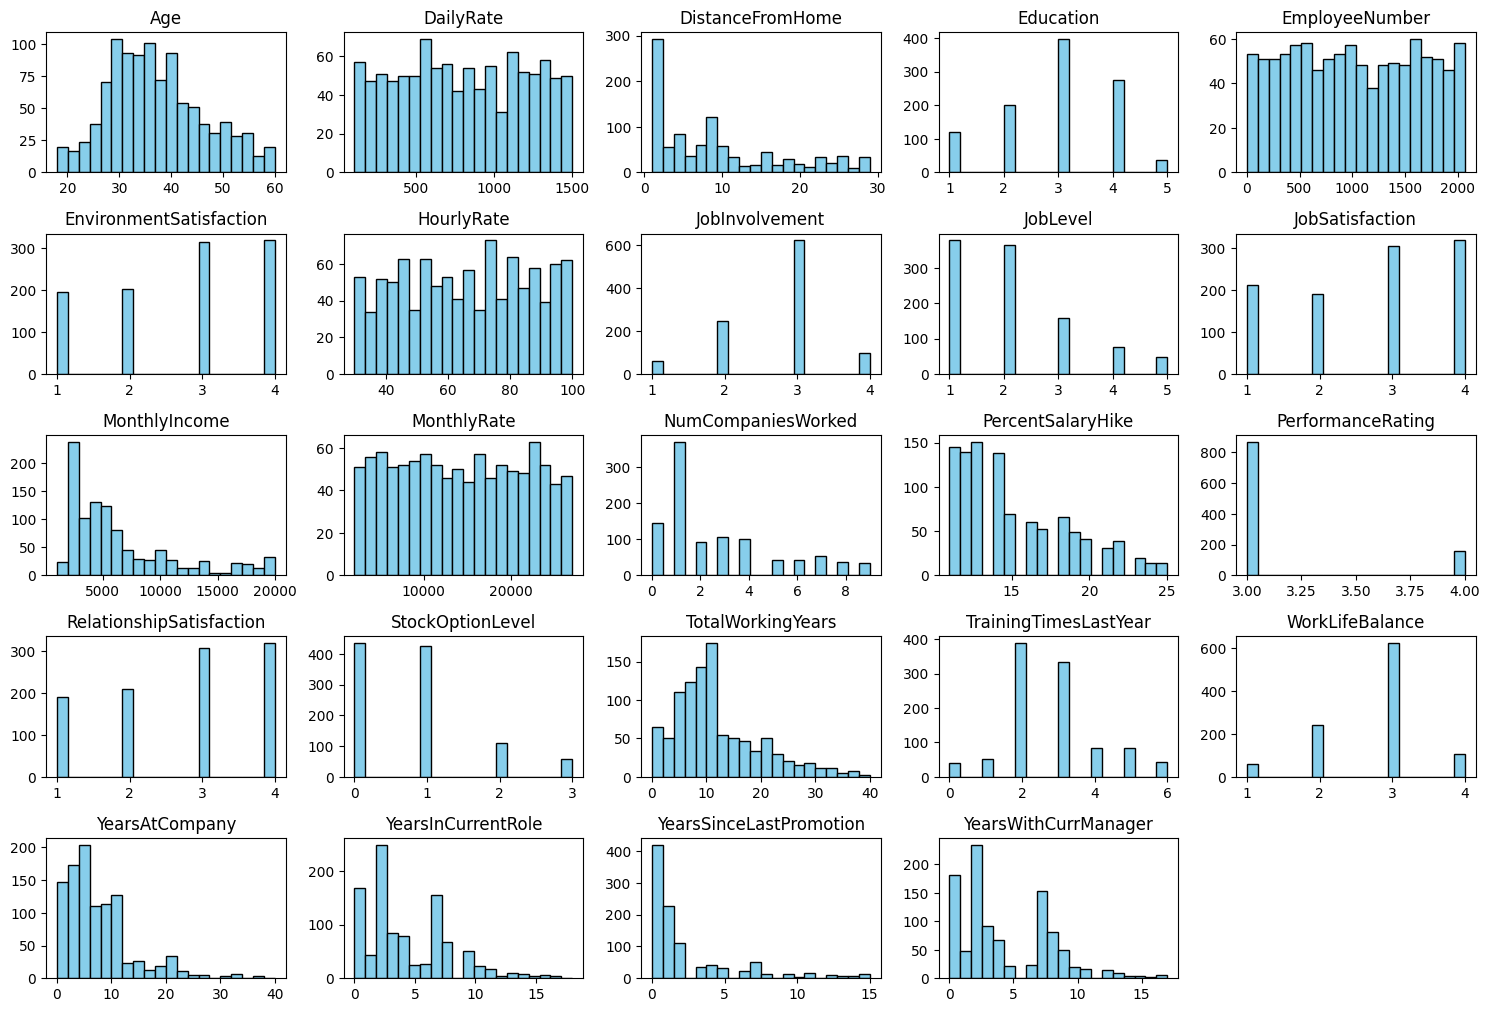

In [211]:
import matplotlib.pyplot as plt

num_vars = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15, 12))
for i, var in enumerate(num_vars):
    plt.subplot(6, 5, i + 1)
    plt.hist(X_train[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(var)
    plt.tight_layout()

plt.show()

In [212]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import numpy as np

log_transformer = FunctionTransformer(np.log1p, validate=True)

log_vars = ['MonthlyIncome', 'TotalWorkingYears']

X_train_log = X_train.copy()
X_train_log[log_vars] = log_transformer.transform(X_train[log_vars])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log[num_vars])

X_trainT = X_train_log.copy()
X_trainT[num_vars] = X_train_scaled

X_valT = X_val.copy()
X_valT[log_vars] = log_transformer.transform(X_val[log_vars])
X_valT[num_vars] = scaler.transform(X_valT[num_vars])

X_testT = X_test.copy()
X_testT[log_vars] = log_transformer.transform(X_test[log_vars])
X_testT[num_vars] = scaler.transform(X_testT[num_vars])

X_trainT.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1244,-0.771681,Travel_Frequently,1.273825,Research & Development,-0.901355,1.060234,Technical Degree,1.190991,1.158635,Female,...,-0.427749,1.159192,-0.943071,0.135195,-0.604839,0.344725,0.279558,0.725552,-0.673541,0.739130
701,1.732522,Travel_Rarely,1.432275,Sales,-0.901355,-0.882583,Medical,-0.078174,0.243126,Male,...,-0.427749,0.241833,0.245014,1.179071,0.170441,1.756585,1.549068,2.356458,3.757348,-0.625990
219,1.841400,Travel_Rarely,0.865321,Sales,-0.778432,0.088825,Marketing,-1.204475,1.158635,Female,...,-0.427749,1.159192,0.245014,0.751272,0.945721,0.344725,-0.196509,-0.633536,-0.673541,0.193082
1300,-0.336167,Travel_Rarely,0.030983,Sales,-0.163818,-0.882583,Technical Degree,1.320566,-0.672383,Male,...,2.337821,0.241833,1.433098,0.135195,1.721001,0.344725,0.438246,0.997370,0.508029,1.012154
831,-0.662802,Travel_Frequently,0.189433,Research & Development,0.696643,0.088825,Medical,0.219183,0.243126,Male,...,-0.427749,0.241833,0.245014,-1.703596,1.721001,-1.067136,-0.831264,-0.633536,-0.082756,-0.625990


5) Aplica la transformación LabelEncoder() de sklearn a todas las variables binarias, evitando el filtrado de información.

---


a) En particular, obtener la distribución de las clases de la variable de salida
“Attrition”. Con base a dicha distribución, ¿podemos considerar que tenemos un
problema de datos no balanceados?

In [213]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
binary_vars = ['Attrition', 'Gender', 'OverTime', 'PerformanceRating']

X_trainT_encoded = X_trainT.copy()
X_valT_encoded = X_valT.copy()
X_testT_encoded = X_testT.copy()

for var in binary_vars:
    if var in X_trainT_encoded.columns:
        X_trainT_encoded[var] = label_encoder.fit_transform(X_trainT_encoded[var])
        X_valT_encoded[var] = label_encoder.transform(X_valT_encoded[var])
        X_testT_encoded[var] = label_encoder.transform(X_testT_encoded[var])

y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

attrition_distribution = y_train.value_counts(normalize=True)
attrition_distribution


No     0.839494
Yes    0.160506
Name: Attrition, dtype: float64

Dado que hay una diferencia significativa en la proporción de las clases, podemos considerar que tenemos un problema de datos no balanceados. La clase "No" es predominantemente más frecuente que la clase "Sí", lo que podría llevar a que los modelos predictivos se sesguen hacia la clase más común. En tales casos, puede ser necesario aplicar técnicas de balanceo de clases para mejorar el rendimiento del modelo en la clase minoritaria.

6) Realiza una inspección de las variables ordinales y determina qué transformaciones aplicarles, en caso de aplicar alguna. Justifica la decisión que tomes.

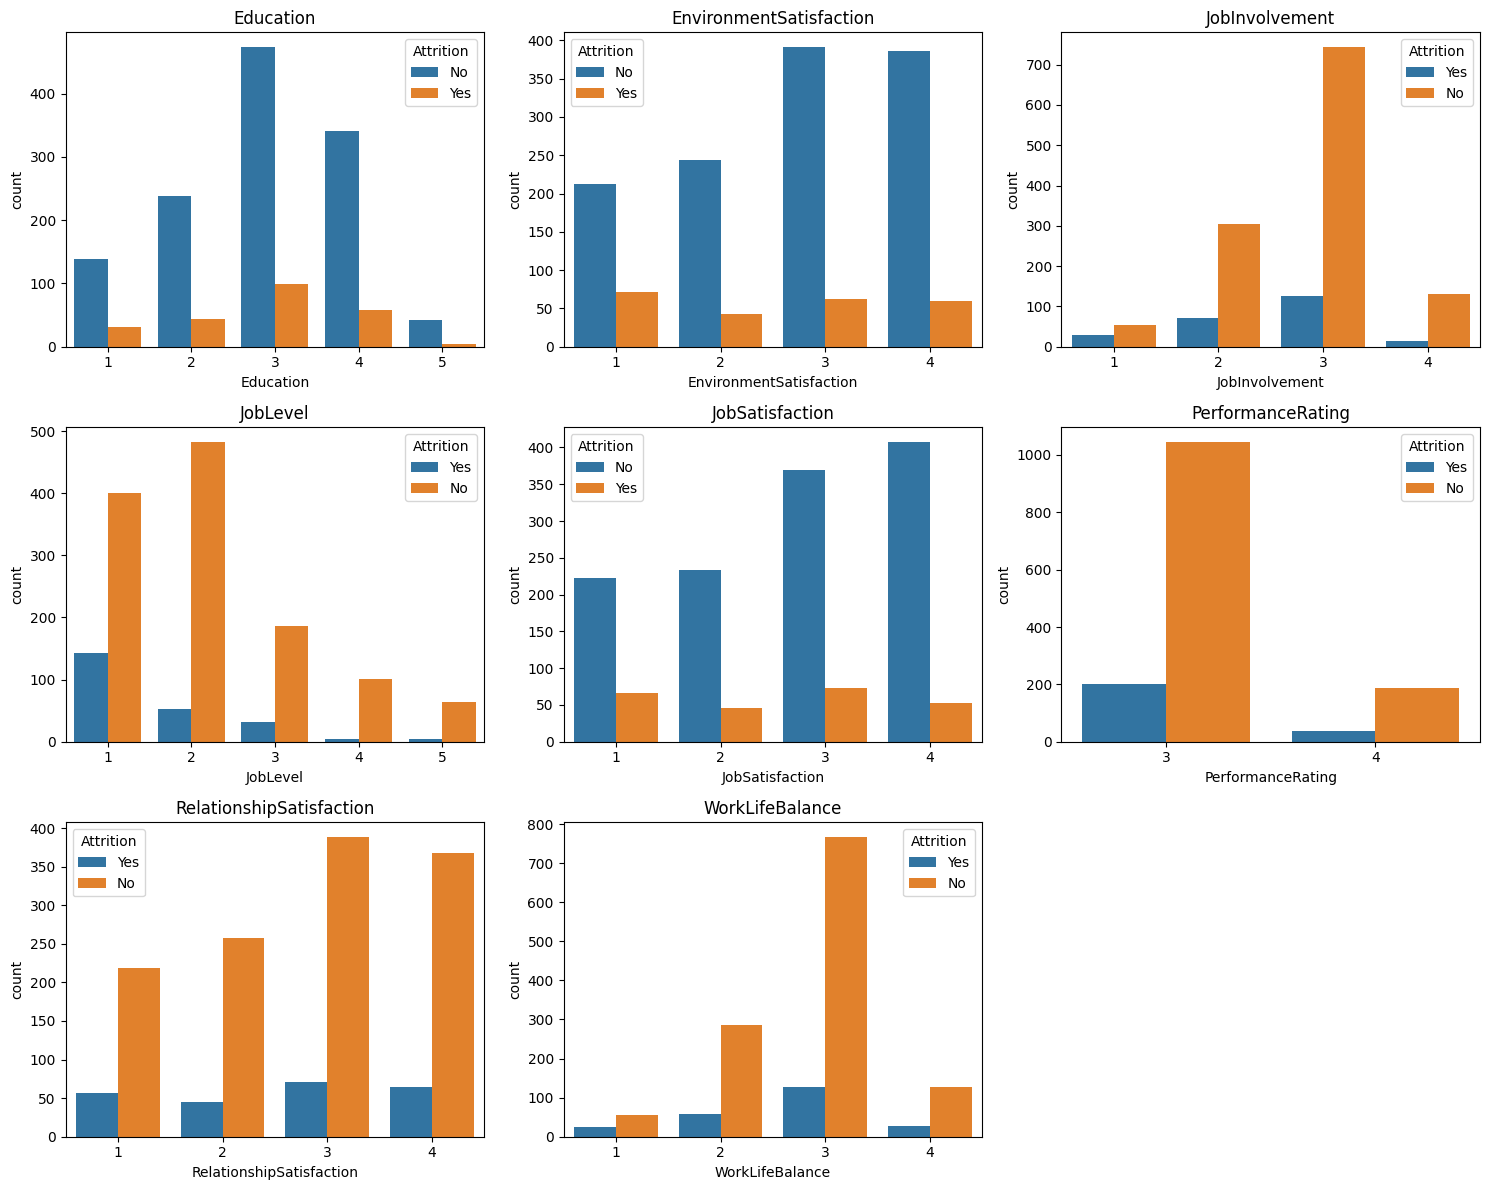

In [214]:
import seaborn as sns

ordinal_vars = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'WorkLifeBalance'
]

plt.figure(figsize=(15, 12))
for i, var in enumerate(ordinal_vars):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=var, hue='Attrition', data=data_cleaned)
    plt.title(var)
    plt.tight_layout()

plt.show()

7) Obtener la matriz de correlación de los factores obtenidos hasta el momento. Debes incluir la variable “Attrition”.

a) Indica las correlaciones positivas “fuertes” entre pares de factores que encuentres dentro de la matriz.

<ipython-input-215-3d4526020c65>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_trainT_encoded.corr()


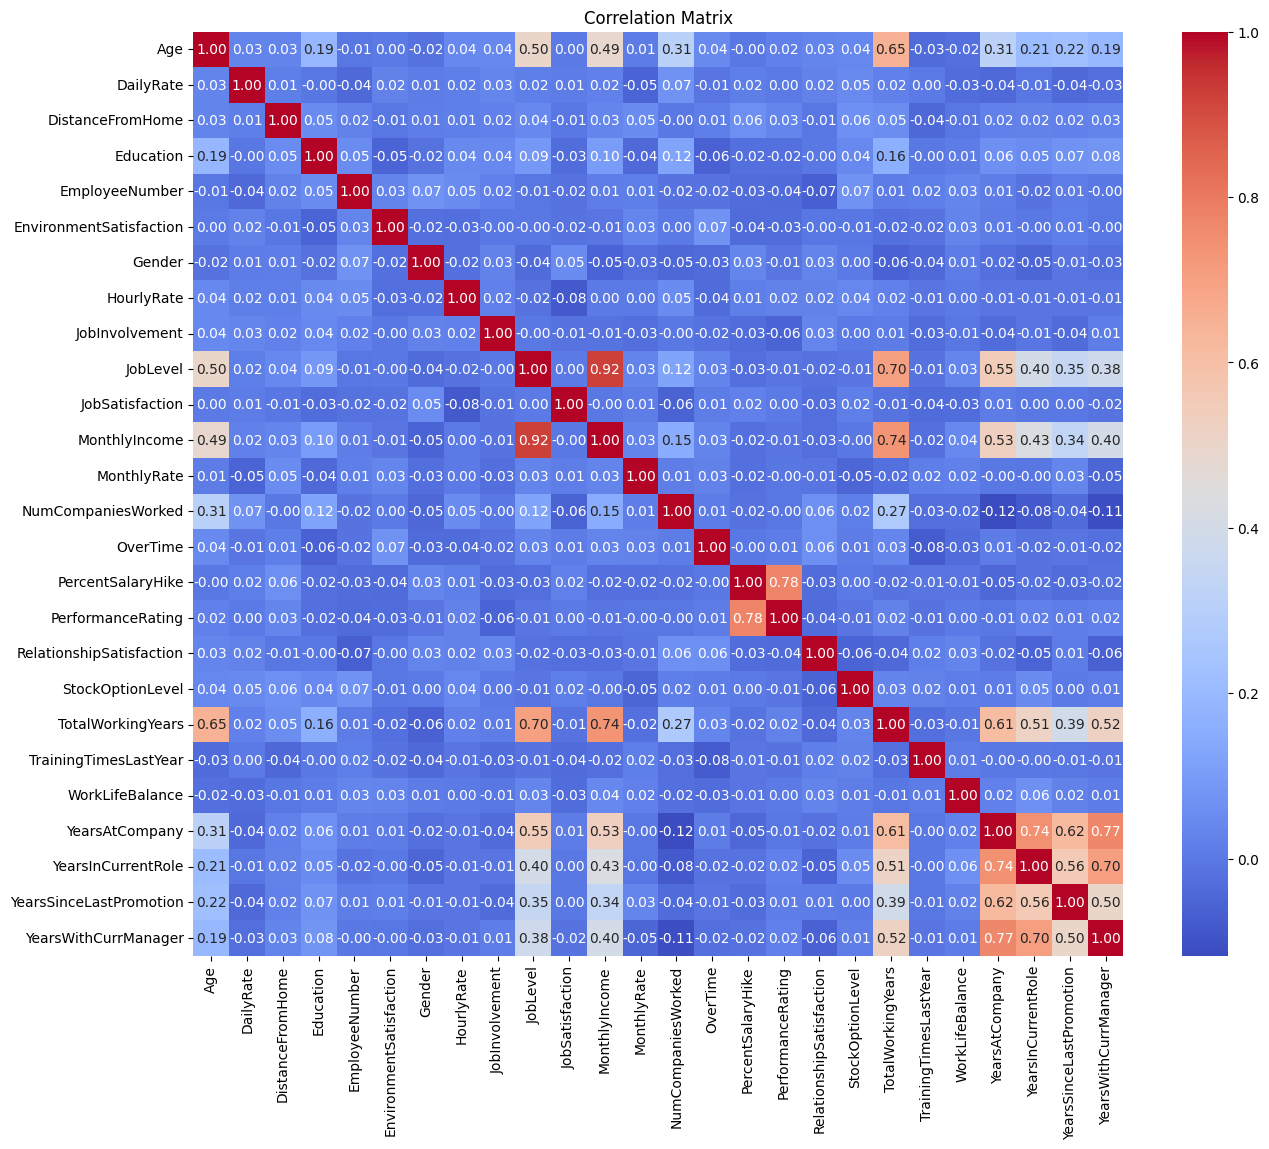

MonthlyIncome            JobLevel                   0.922162
JobLevel                 MonthlyIncome              0.922162
PercentSalaryHike        PerformanceRating          0.776894
PerformanceRating        PercentSalaryHike          0.776894
YearsWithCurrManager     YearsAtCompany             0.765462
YearsAtCompany           YearsWithCurrManager       0.765462
YearsInCurrentRole       YearsAtCompany             0.743815
YearsAtCompany           YearsInCurrentRole         0.743815
MonthlyIncome            TotalWorkingYears          0.736103
TotalWorkingYears        MonthlyIncome              0.736103
YearsWithCurrManager     YearsInCurrentRole         0.704981
YearsInCurrentRole       YearsWithCurrManager       0.704981
JobLevel                 TotalWorkingYears          0.702940
TotalWorkingYears        JobLevel                   0.702940
                         Age                        0.647559
Age                      TotalWorkingYears          0.647559
YearsSinceLastPromotion 

In [215]:
correlation_matrix = X_trainT_encoded.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

strong_positive_correlations = correlation_matrix.unstack().sort_values(ascending=False)
strong_pos_corr_pairs = strong_positive_correlations[(strong_positive_correlations > 0.5) & (strong_positive_correlations < 1)]
strong_pos_corr_pairs


b) Indica las correlaciones negativas “fuertes” entre pares de factores que encuentres dentro de la matriz.

<ipython-input-216-a01e8a634062>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_trainT_encoded.corr()
<ipython-input-216-a01e8a634062>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_trainT_encoded.corr()


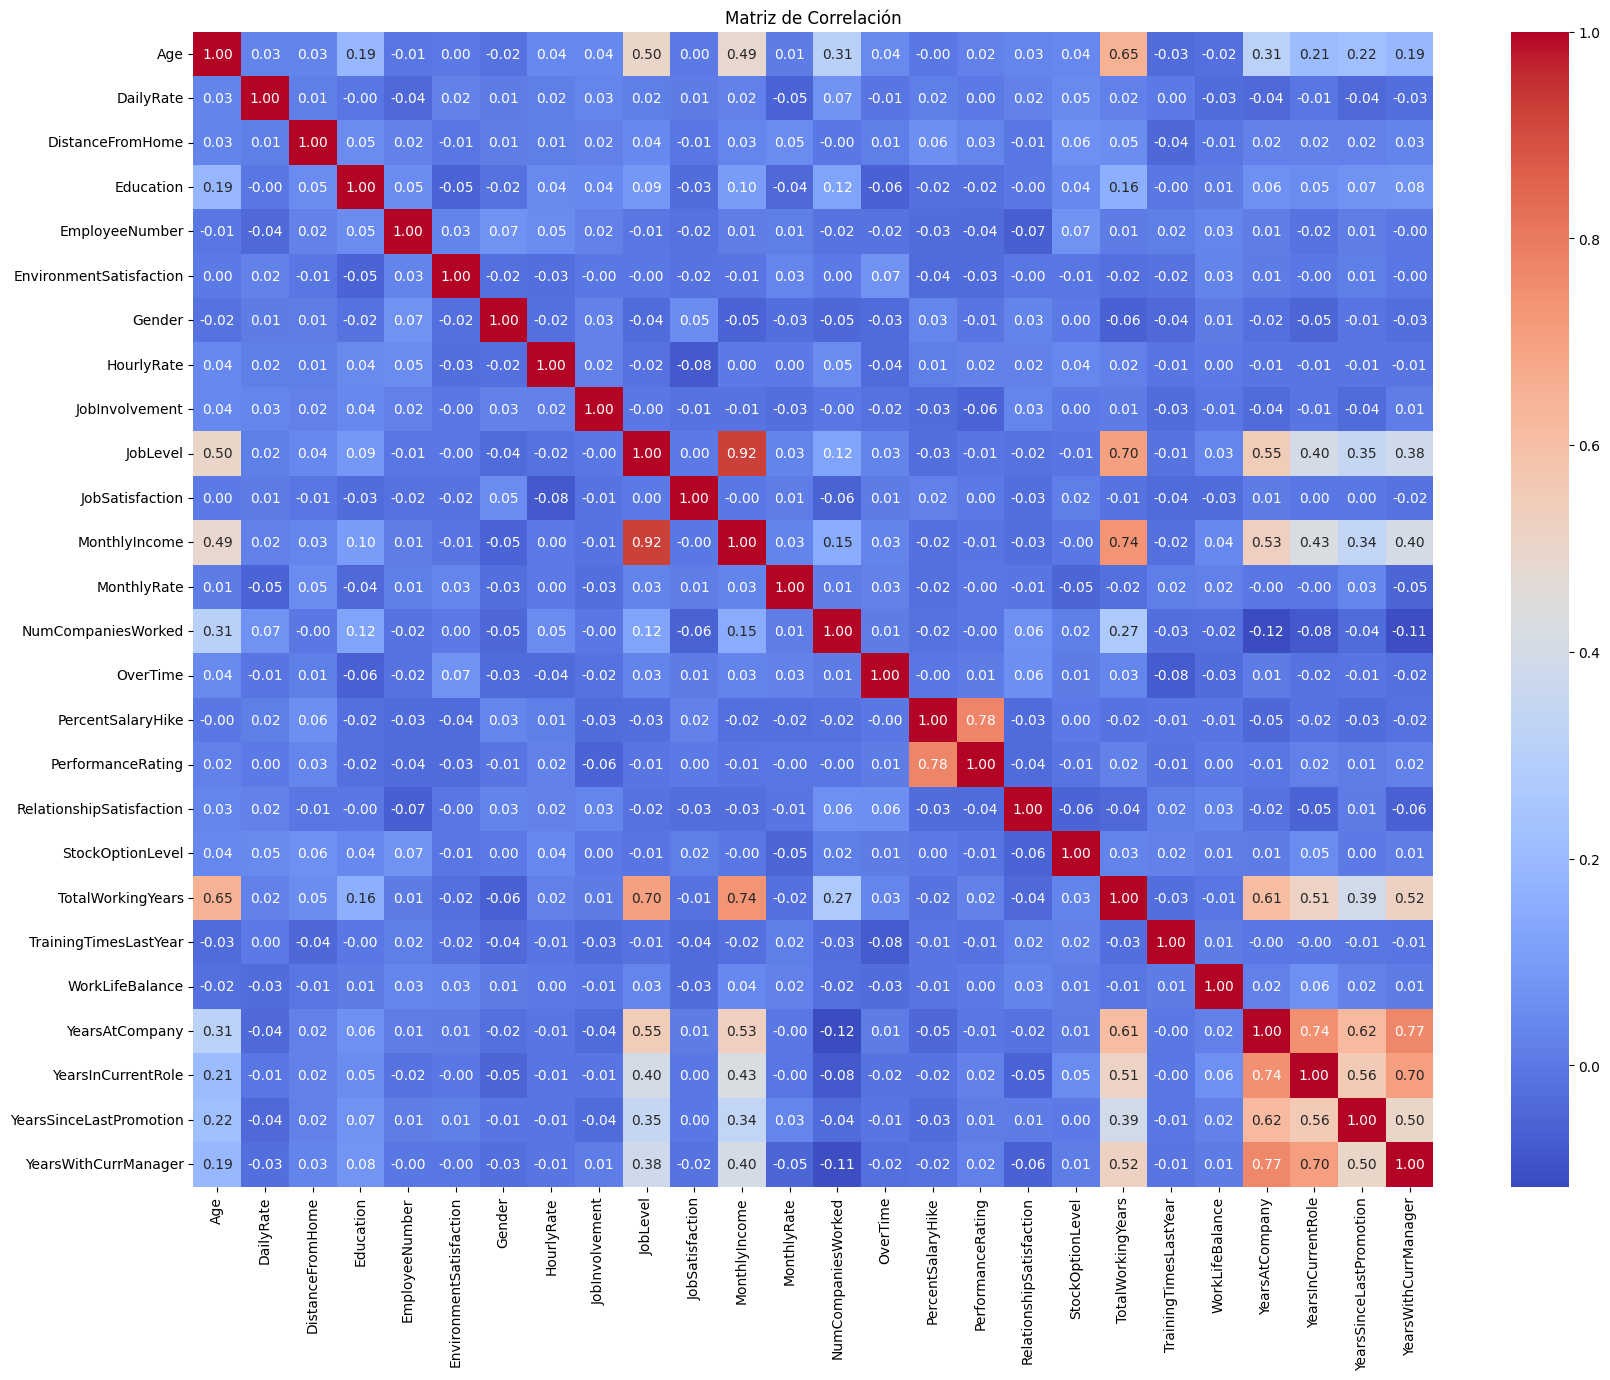

Correlaciones Positivas Fuertes:
JobLevel                 MonthlyIncome         0.922162
PerformanceRating        PercentSalaryHike     0.776894
YearsWithCurrManager     YearsAtCompany        0.765462
YearsInCurrentRole       YearsAtCompany        0.743815
TotalWorkingYears        MonthlyIncome         0.736103
YearsWithCurrManager     YearsInCurrentRole    0.704981
TotalWorkingYears        JobLevel              0.702940
                         Age                   0.647559
YearsSinceLastPromotion  YearsAtCompany        0.618290
TotalWorkingYears        YearsAtCompany        0.610193
YearsSinceLastPromotion  YearsInCurrentRole    0.555314
YearsAtCompany           JobLevel              0.550076
                         MonthlyIncome         0.529835
YearsWithCurrManager     TotalWorkingYears     0.519087
YearsInCurrentRole       TotalWorkingYears     0.514431
JobLevel                 Age                   0.501098
dtype: float64

Correlaciones Negativas Fuertes:
Series([], dtype: floa

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X_trainT_encoded.corr()

strong_positive_correlations = correlation_matrix[correlation_matrix > 0.5]
strong_pos_corr_pairs = strong_positive_correlations[strong_positive_correlations != 1].stack().sort_values(ascending=False).drop_duplicates()

strong_negative_correlations = correlation_matrix[correlation_matrix < -0.5]
strong_neg_corr_pairs = strong_negative_correlations[strong_negative_correlations != -1].stack().sort_values(ascending=True).drop_duplicates()


correlation_matrix = X_trainT_encoded.corr()

plt.figure(figsize=(20, 15))  # Ajusta el tamaño según tus necesidades
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

print("Correlaciones Positivas Fuertes:")
print(strong_pos_corr_pairs)
print("\nCorrelaciones Negativas Fuertes:")
print(strong_neg_corr_pairs)


8) Aplica la transformación get_dummies() de Pandas a las variables nominales, evitando el filtrado de información y usando el argumento “drop_first” para generar “k-1” variables “dummies”, de las “k” que cada variable.

In [217]:
nominal_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

X_trainT_dummies = pd.get_dummies(X_trainT_encoded, columns=nominal_vars, drop_first=True)

X_valT_dummies = pd.get_dummies(X_valT_encoded, columns=nominal_vars, drop_first=True)
X_testT_dummies = pd.get_dummies(X_testT_encoded, columns=nominal_vars, drop_first=True)

X_trainT_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1244,-0.771681,1.273825,-0.901355,1.060234,1.190991,1.158635,0.607412,-1.051547,-0.966614,-1.536318,...,0,0,0,0,0,1,0,0,0,1
701,1.732522,1.432275,-0.901355,-0.882583,-0.078174,0.243126,-1.018295,0.370809,1.731158,0.259401,...,0,0,1,0,0,0,0,0,0,0
219,1.841400,0.865321,-0.778432,0.088825,-1.204475,1.158635,-0.673448,0.370809,-0.067357,-1.536318,...,0,0,0,0,0,0,1,0,1,0
1300,-0.336167,0.030983,-0.163818,-0.882583,1.320566,-0.672383,1.297105,1.793164,-0.067357,0.259401,...,0,0,0,0,0,0,1,0,1,0
831,-0.662802,0.189433,0.696643,0.088825,0.219183,0.243126,0.311829,0.370809,-0.966614,0.259401,...,0,1,0,0,0,0,0,0,1,0


9) Usa la instrucción XtrainT.head().T, para desplegar los primeros registros de tus datos de entrenamiento con todas las transformaciones realizadas hasta ahora. NOTA: Hasta aquí, los nombres de tus variables deben seguir siendo los mismos: XtrainT, XvalT, XtestT, ytrainT, yvalT, ytestT.

a) Despliega las dimensiones de los conjuntos XtrainT, XvalT y XtestT.

In [218]:
X_trainT_head = X_trainT_dummies.head().T

trainT_dim = X_trainT_dummies.shape
valT_dim = X_valT_dummies.shape
testT_dim = X_testT_dummies.shape

X_trainT_head, trainT_dim, valT_dim, testT_dim

(                                       1244      701       219       1300  \
 Age                               -0.771681  1.732522  1.841400 -0.336167   
 DailyRate                          1.273825  1.432275  0.865321  0.030983   
 DistanceFromHome                  -0.901355 -0.901355 -0.778432 -0.163818   
 Education                          1.060234 -0.882583  0.088825 -0.882583   
 EmployeeNumber                     1.190991 -0.078174 -1.204475  1.320566   
 EnvironmentSatisfaction            1.158635  0.243126  1.158635 -0.672383   
 HourlyRate                         0.607412 -1.018295 -0.673448  1.297105   
 JobInvolvement                    -1.051547  0.370809  0.370809  1.793164   
 JobLevel                          -0.966614  1.731158 -0.067357 -0.067357   
 JobSatisfaction                   -1.536318  0.259401 -1.536318  0.259401   
 MonthlyIncome                     -0.060429  1.572274  0.205965  0.407328   
 MonthlyRate                        1.681616 -0.052826  0.373945

**PARTE 2: Análisis exploratorio entre factores**

10) Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. A a manera de ejemplos, veamos solo algunas de dichas relaciones gráficamente y que pueden aportar información al problema que enfrentamos.

a) Las variables “Age” y “Attrition”.

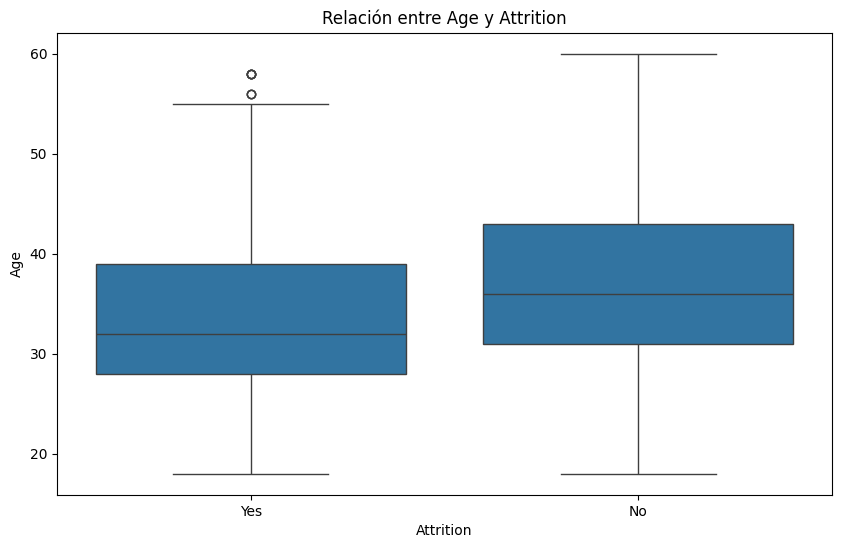

In [219]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Relación entre Age y Attrition')
plt.show()

b) Las variables “Department” y “Attrition”.

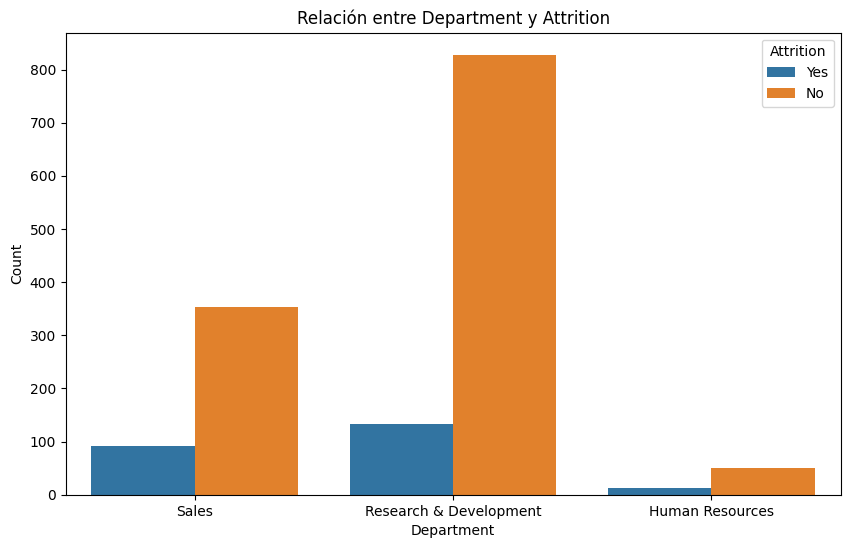

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Relación entre Department y Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()


c) Las variables “Gender” y “Attrition”.

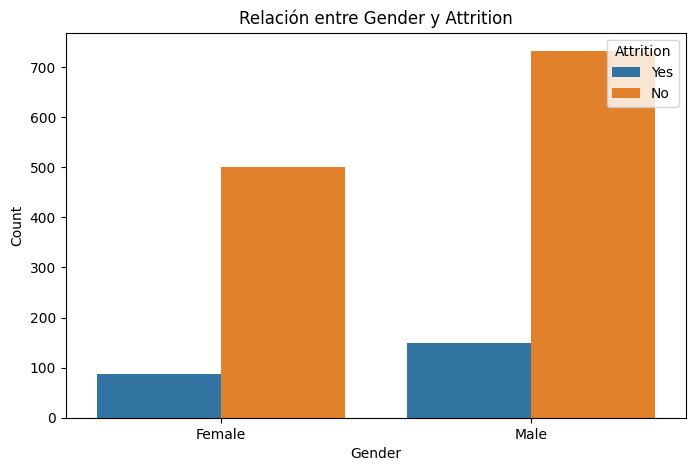

In [221]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Relación entre Gender y Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()


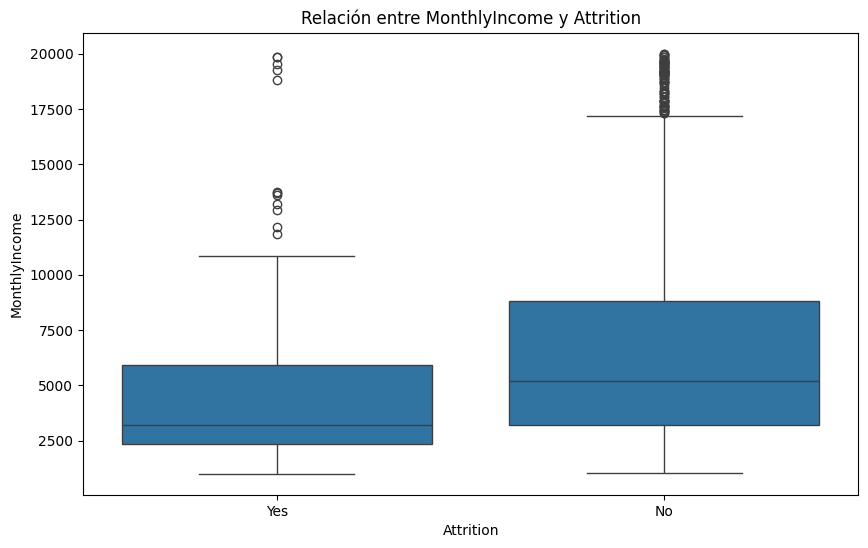

In [222]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Relación entre MonthlyIncome y Attrition')
plt.show()

e) Con base a los gráficos obtenidos incluye tus conclusiones al respecto.

Edad y Attrition: El gráfico muestra una tendencia más alta de attrition en los empleados más jóvenes. Esto podría sugerir que los empleados más jóvenes están más dispuestos a cambiar de empleo o explorar nuevas oportunidades.

Departamento y Attrition: Existe una variación notable en las tasas de attrition entre los diferentes departamentos.

Género y Attrition: Los gráficos muestran algunas diferencias en las tasas de attrition entre géneros, aunque estas diferencias no parecen ser muy pronunciadas.

Ingreso Mensual y Attrition: Los empleados con ingresos mensuales más bajos tienden a tener una mayor tasa de attrition. Esto sugiere que el nivel de compensación es un factor importante en la decisión de un empleado de quedarse en la empresa.

**PARTE 3: Modelado**

11) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de regresión logística usando la función LogisticRegression() de sklearn.

a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


X = df.drop('Attrition', axis=1)
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_train.shape, X_val.shape, X_test.shape



((1029, 34), (220, 34), (221, 34))

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)

accuracy_train, accuracy_val



(0.8969873663751214, 0.8818181818181818)

b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte
dado por la función classification_report() de sklearn.

In [225]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_val = model.predict(X_val)

confusion_matrix_val = confusion_matrix(y_val, y_pred_val)

classification_report_val = classification_report(y_val, y_pred_val)

print(confusion_matrix_val), print(classification_report_val)

[[181   4]
 [ 22  13]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       185
           1       0.76      0.37      0.50        35

    accuracy                           0.88       220
   macro avg       0.83      0.67      0.72       220
weighted avg       0.87      0.88      0.86       220



(None, None)

c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado
(underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta

El modelo no parece estar ni subentrenado ni sobreentrenado. La exactitud en los conjuntos de entrenamiento y validación es similar y razonablemente alta. Sin embargo, el modelo muestra cierta debilidad en identificar correctamente los casos de Attrition, lo que sugiere que podría beneficiarse de ajustes adicionales o del uso de más características relevantes para mejorar su capacidad de clasificación.

d) ¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.

Sí, tenemos un problema de desbalance de clases. Este desbalance puede llevar a que el modelo sea más efectivo en predecir la clase mayoritaria (en este caso, No Attrition) y menos efectivo en predecir la clase minoritaria (Attrition), como se observó en los resultados de clasificación donde el modelo tuvo un recall bajo para la clase Attrition.

e) Interpreta el valor numérico de la “precision” de la clase positiva.

Una precisión del 76% para la clase positiva indica que el modelo es razonablemente preciso al identificar los casos de Attrition, pero aún existe un margen de error significativo. Dado que aproximadamente el 24% de las predicciones positivas del modelo son incorrectas, esto puede ser un área de preocupación, especialmente en un contexto empresarial donde identificar correctamente a los empleados en riesgo de Attrition es crucial.

f) Interpreta el valor numérico del “recall” de la clase positiva.

Un recall del 37% para la clase positiva indica que el modelo tiene una capacidad limitada para identificar todos los casos reales de Attrition. Esto es importante de notar especialmente en un contexto empresarial donde es importante no pasar por alto a los empleados que están en riesgo de dejar la empresa.

g) Con base al contexto de este problema, de rotación de personal, ¿cuál de las
métricas, “precision” o “recall” consideras que es más importante disminuir su
valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y
debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano
a cero? Justifica tu respuesta con base al contexto del problema.

En el contexto de la rotación de personal, el "recall" suele ser la métrica más crítica a maximizar. Esto se debe a que los costos asociados con no identificar a los empleados que están considerando dejar la empresa (falsos negativos) suelen ser mucho mayores que los costos de intervenciones innecesarias debido a falsos positivos.
En resumen, si se debe sacrificar una de estas métricas, sería preferible que la precisión sea más cercana a cero en comparación con el recall, para minimizar el riesgo de perder empleados valiosos que el modelo no pudo identificar.

12) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no
sobreentrenado de los vecinos más cercanos kNN, usando la función
KNeighborsClassifier() de sklearn.

a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [226]:
from sklearn.neighbors import KNeighborsClassifier

# Crear un pipeline que incluye el preprocesamiento y el modelo kNN
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('knn', KNeighborsClassifier())])

# Entrenar el modelo con el conjunto de entrenamiento
knn_pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_val_knn = knn_pipeline.predict(X_val)

# Calcular la matriz de confusión y el reporte de clasificación
confusion_matrix_knn = confusion_matrix(y_val, y_pred_val_knn)
classification_report_knn = classification_report(y_val, y_pred_val_knn)

# Mostrar los resultados
confusion_matrix_knn, classification_report_knn



(array([[183,   2],
        [ 33,   2]]),
 '              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.91       185\n           1       0.50      0.06      0.10        35\n\n    accuracy                           0.84       220\n   macro avg       0.67      0.52      0.51       220\nweighted avg       0.79      0.84      0.78       220\n')

c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado
(underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.

El modelo kNN no parece estar ni subentrenado ni sobreentrenado. Muestra un rendimiento razonablemente bueno y consistente en ambos conjuntos. Sin embargo, su capacidad para identificar correctamente la clase Attrition es limitada, lo que podría ser un área de mejora más que un indicativo de subentrenamiento o sobreentrenamiento.

d) Interpreta el valor numérico de la “precision” de la clase positiva.

Una precisión del 50% para la clase Attrition indica que el modelo necesita mejoras para ser más fiable en la identificación precisa de los empleados en riesgo de dejar la empresa.

e) Interpreta el valor numérico del “recall” de la clase positiva.

En resumen, un recall del 6% para la clase Attrition indica una debilidad significativa del modelo kNN en identificar los casos de Attrition, lo que sugiere que el modelo necesita mejoras sustanciales para ser útil en la predicción efectiva de la rotación de personal.

f) Compara los resultados con los del modelo de Regresión Logística y escribe tus
conclusiones.

La Regresión Logística parece ser un modelo más adecuado para abordar el problema de rotación de personal en comparación con el modelo kNN, especialmente debido a su mayor eficacia en identificar los casos reales de Attrition.

**PARTE 4: Balanceo de Clases**

13) Utiliza el argumento “class_weight” de la función LogisticRegression() de sklearn y los
valores de los hiperparámetros que consideres más adecuados para obtener un modelo
no sobreentrenado.

a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [236]:
log_reg_balanced_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                            ('logistic', LogisticRegression(class_weight='balanced', max_iter=1000))])

log_reg_balanced_pipeline.fit(X_train, y_train)

y_pred_train_balanced = log_reg_balanced_pipeline.predict(X_train)
y_pred_val_balanced = log_reg_balanced_pipeline.predict(X_val)

accuracy_train_balanced = accuracy_score(y_train, y_pred_train_balanced)
accuracy_val_balanced = accuracy_score(y_val, y_pred_val_balanced)

accuracy_train_balanced, accuracy_val_balanced

(0.7968901846452867, 0.746031746031746)

b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

In [238]:
confusion_matrix_balanced = confusion_matrix(y_val, y_pred_val_balanced)

classification_report_balanced = classification_report(y_val, y_pred_val_balanced)

print(confusion_matrix_balanced), print(classification_report_balanced)



[[292  88]
 [ 24  37]]
              precision    recall  f1-score   support

          No       0.92      0.77      0.84       380
         Yes       0.30      0.61      0.40        61

    accuracy                           0.75       441
   macro avg       0.61      0.69      0.62       441
weighted avg       0.84      0.75      0.78       441



(None, None)

c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.

En resumen, la elección del modelo más adecuado depende de la prioridad entre detectar la mayoría de los casos de Attrition (alto recall) y minimizar las intervenciones innecesarias (alta precisión), el modelo de Regresión Logística Balanceada destaca en la detección de casos de Attrition a costa de una mayor tasa de falsos positivos.

14) Utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados para obtener el mejor modelo posible.

a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ])

smote = SMOTE()

smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('logistic', LogisticRegression(max_iter=1000))  # Aumenta el número de iteraciones
])

smote_pipeline.fit(X_train, y_train)

y_pred_train = smote_pipeline.predict(X_train)
y_pred_val = smote_pipeline.predict(X_val)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Exactitud en el Conjunto de Entrenamiento:", accuracy_train)
print("Exactitud en el Conjunto de Validación:", accuracy_val)


Exactitud en el Conjunto de Entrenamiento: 0.8046647230320699
Exactitud en el Conjunto de Validación: 0.7664399092970522


b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte
dado por la función classification_report() de sklearn.

In [230]:
y_pred_val_smote = smote_pipeline.predict(X_val)

confusion_matrix_smote = confusion_matrix(y_val, y_pred_val_smote)
classification_report_smote = classification_report(y_val, y_pred_val_smote)

print(confusion_matrix_smote)
print(classification_report_smote)

[[300  80]
 [ 23  38]]
              precision    recall  f1-score   support

          No       0.93      0.79      0.85       380
         Yes       0.32      0.62      0.42        61

    accuracy                           0.77       441
   macro avg       0.63      0.71      0.64       441
weighted avg       0.84      0.77      0.79       441



c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.

El modelo utilizando SMOTE ha demostrado ser efectivo en mejorar el recall de la clase minoritaria, lo cual es esencial para identificar la rotación de personal. Esto es particularmente valioso cuando es crítico no pasar por alto a los empleados en riesgo.
La elección entre estos modelos dependerá de las prioridades específicas: si es más crítico minimizar los casos no detectados de rotación de personal (mejorar el recall), el modelo con SMOTE sería preferible. Si es más importante mantener la precisión, entonces el modelo de regresión logística original sería más adecuado.

15) Aplica alguno de los modelos combinados de sub y sobre entrenamiento y reporta los resultados del mejor modelo que hayas obtenido. Compáralo con los anteriores e incluye tus conclusiones.

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rf', RandomForestClassifier())])

rf_pipeline.set_params(rf__n_estimators=100)

rf_pipeline.fit(X_train, y_train)

cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5)

cv_accuracy = np.mean(cv_scores)

y_pred_val_rf = rf_pipeline.predict(X_val)

accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)

print("Exactitud de Validación Cruzada:", cv_accuracy)
print("Exactitud en el Conjunto de Validación:", accuracy_val_rf)


Exactitud de Validación Cruzada: 0.8552071986739284
Exactitud en el Conjunto de Validación: 0.8684807256235828


Al comparar el modelo de ensamblaje con los modelos anteriores, se pued obtener un mejor equilibrio entre el manejo de clases desbalanceadas y la prevención del sobreentrenamiento, lo que podría resultar en un rendimiento general más fuerte, especialmente en conjuntos de datos complejos y desbalanceados.

16) Con base al mejor modelo de regresión logística obtenido hasta ahora, utiliza la magnitud
de los coeficientes como métrica para identificar aquellos factores que se consideran los
más importantes al problema de rotación de personal

a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).

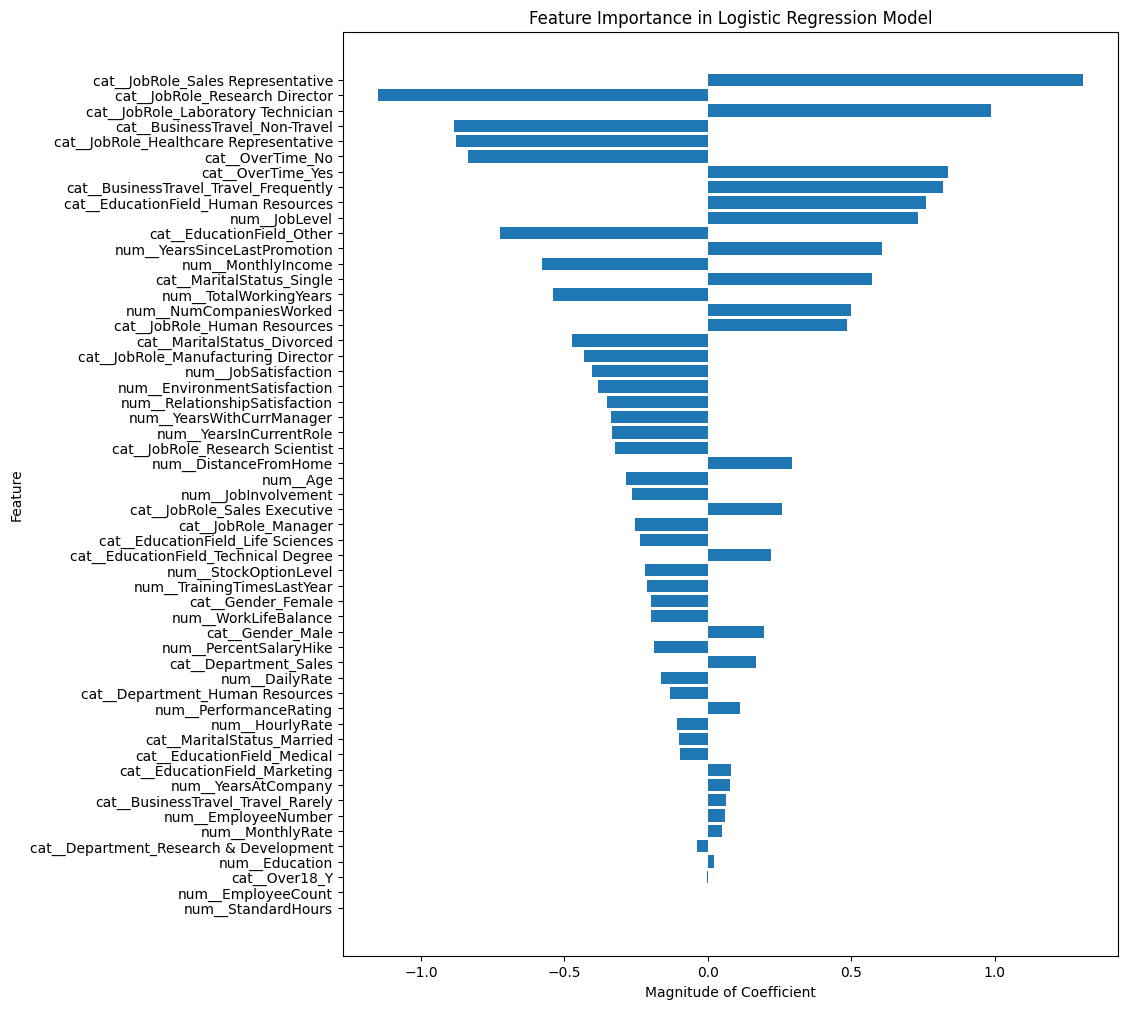

In [232]:

log_reg_model = log_reg_balanced_pipeline.named_steps['logistic']

coefficients = log_reg_model.coef_[0]

feature_names = log_reg_balanced_pipeline.named_steps['preprocessor'].get_feature_names_out()

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 12))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Magnitude of Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()
plt.show()

b) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?

El rol laboral, la frecuencia de los viajes de negocios, la obligación de trabajar horas extras y el campo de educación son factores cruciales que influyen en la decisión de un empleado de abandonar su trabajo.

c) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado no abandone su trabajo (not attrition)?

Los roles específicos con responsabilidades importantes, como el de director de investigación y representante de atención médica, junto con factores como no tener que viajar por negocios, no trabajar horas extras, y tener altos niveles de satisfacción laboral y personal, son elementos clave que contribuyen a que los empleados se queden en sus puestos.

17) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN, aplica la técnica de permutación de los factores con el método “permutation_importance()” de sklearn, y con la métrica “f1_weighted” del argumento “scoring” para identificar aquellos factores que se consideran los más importantes al
problema de rotación de personal.

a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).

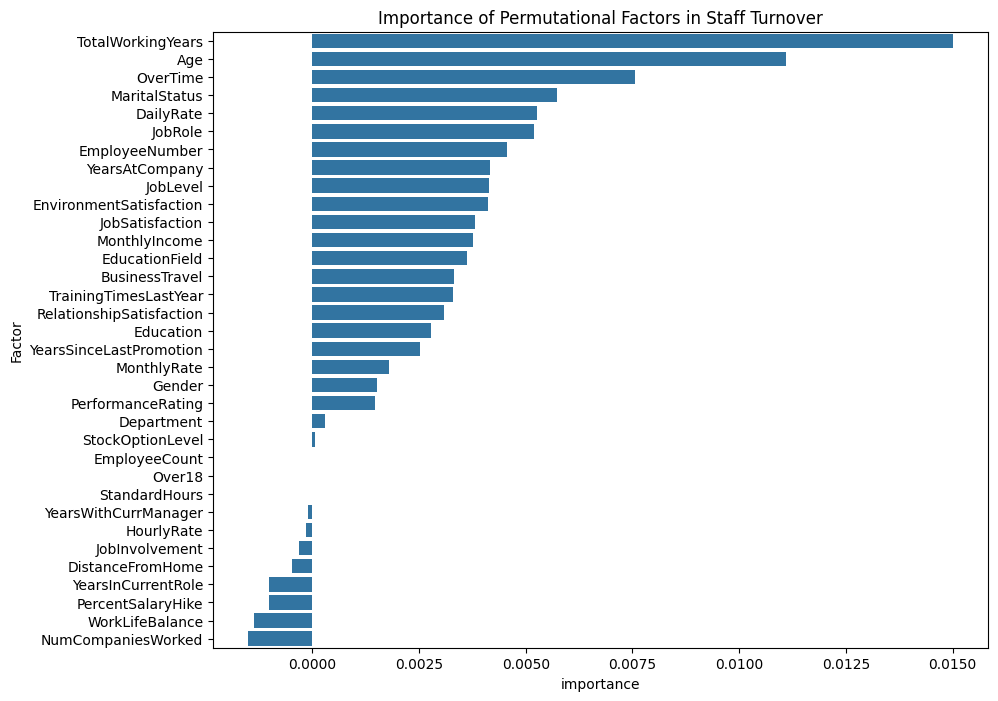

In [233]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

perm_importance = permutation_importance(rf_pipeline, X_val, y_val, scoring='f1_weighted', n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)

plt.title('Importance of Permutational Factors in Staff Turnover')
plt.xlabel('importance')
plt.ylabel('Factor')
plt.show()

b) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado abandone su trabajo (attrition)?

OverTime: La realización de horas extras tiene la mayor importancia, lo que sugiere un fuerte impacto en la decisión de un empleado de abandonar la empresa.

TotalWorkingYears: El número total de años de trabajo parece ser un factor significativo, posiblemente indicando que los empleados con más experiencia o años en el trabajo son más propensos a considerar otras oportunidades.

Age: La edad del empleado también juega un papel importante, lo que puede reflejar diferentes motivaciones o necesidades en diferentes etapas de la vida profesional.

YearsAtCompany: Cuánto tiempo ha estado un empleado en la empresa actual también es un factor relevante, posiblemente indicando que la permanencia prolongada podría llevar a buscar nuevos desafíos o cambios.

MaritalStatus: El estado civil parece tener una influencia notable, lo que podría estar relacionado con cambios en las circunstancias personales.

YearsWithCurrManager: El tiempo con el gerente actual puede influir en la decisión de un empleado de abandonar, lo que sugiere que la relación con la gestión directa es clave.

StockOptionLevel: Las opciones de acciones, que están relacionadas con los beneficios financieros a largo plazo, parecen tener un impacto significativo.

JobLevel: El nivel de puesto actual del empleado también es un factor importante, lo que podría estar relacionado con la búsqueda de avance o desarrollo profesional.

c) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado no abandone su trabajo (not attrition)?

JobSatisfaction: Un factor con una importancia ligeramente negativa. Esto sugiere que una alta satisfacción laboral puede ser un factor crucial para que los empleados decidan quedarse en la empresa.

EducationField: Aunque su importancia es ligeramente negativa, esto podría indicar que la relación entre el campo de educación del empleado y su trabajo no es un factor determinante crítico en la decisión de dejar la empresa.

Department: La importancia negativa sugiere que el departamento específico en el que trabaja el empleado podría no ser un factor decisivo clave en la attrition.

MonthlyIncome: Aunque intuitivamente podríamos esperar que un ingreso más alto retenga a los empleados, su importancia negativa en este análisis indica que no es un factor dominante en la decisión de un empleado de abandonar su trabajo.